In [55]:
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data1=x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
data1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,343,2,1,28.000000,0,0,13.0000
1,76,3,1,25.000000,0,0,7.6500
2,641,3,1,20.000000,0,0,7.8542
3,568,3,0,29.000000,0,4,21.0750
4,672,1,1,31.000000,1,0,52.0000
...,...,...,...,...,...,...,...
886,10,2,0,14.000000,1,0,30.0708
887,61,3,1,22.000000,0,0,7.2292
888,535,3,0,30.000000,0,0,8.6625
889,102,3,1,29.699118,0,0,7.8958


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### 1. Read your Titanic dataset as usual: Training set and Testing set Apply decision tree. 

In [18]:

x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


### 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

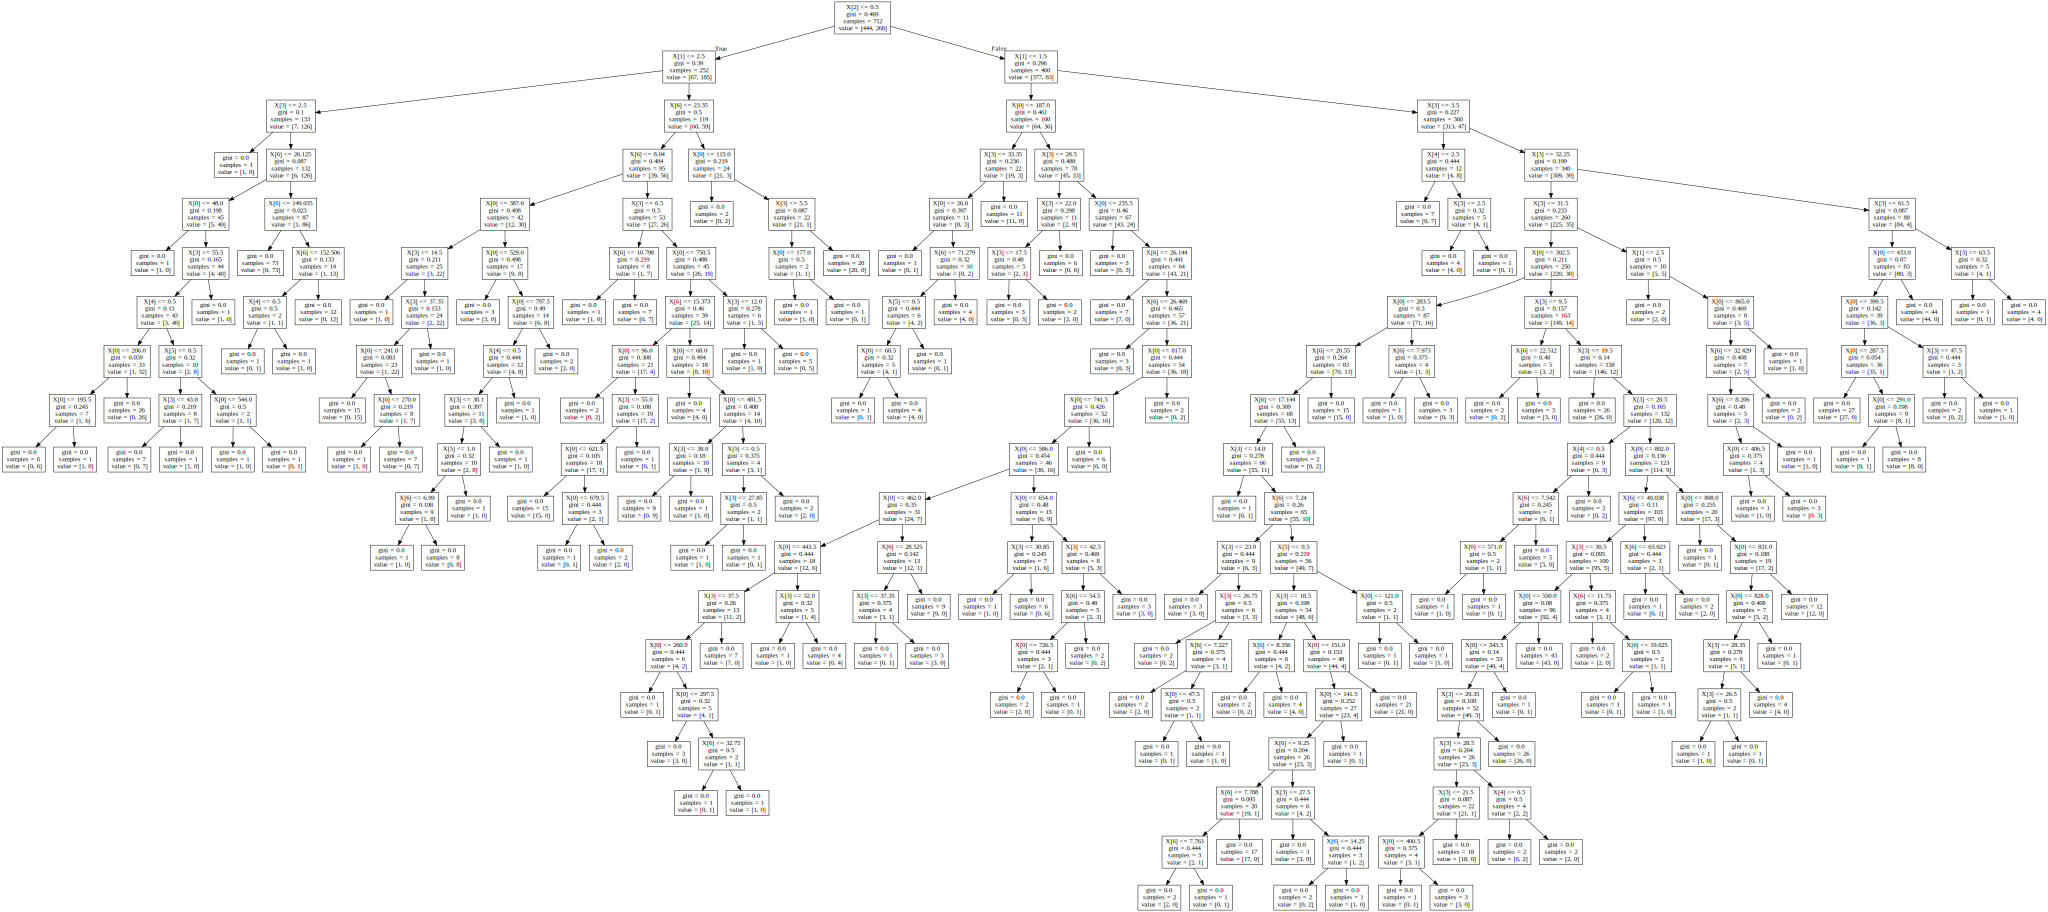

In [52]:

##import graphviz


dot_data=tree.export_graphviz(tree1,out_file=None)
graph= graphviz.Source(dot_data)
graph.render("data")
graph


if sex is female and age <=2.5 then survived is 0 


### 3. Change the decision tree parameters(change at least two parameters), 

In [60]:
tree2 = tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_depth=5)  
tree2.fit(x_train, y_train)   #fitting our model
y_pred2=tree2.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred2)))

score:0.7877094972067039


### 4. Calculate the new accuracy and compare it with the previous results. 

In [62]:
print("score:{}".format(accuracy_score(y_test, y_pred)))
print("score2:{}".format(accuracy_score(y_test, y_pred2)))

score:0.7821229050279329
score2:0.7877094972067039


the score2 is litter better than score1

### 5. Use random forest then change the number of estimators

In [65]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier


In [71]:
clf=RandomForestClassifier(n_estimators=30)  
clf.fit(x_train, y_train)  #Training our model
y_pred3=clf.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred3))  #Measuring the accuracy of our model

Accuracy: 0.8491620111731844


### 6. Calculate the new accuracy and compare it with the previous result.

for n_estimators=10 =>  Accuracy: 0.8379888268156425.
for n_estimators=20 =>  Accuracy: 0.8491620111731844.
for n_estimators=30 =>  Accuracy: 0.8547486033519553.
when the n_estimators is bigger the accuracy is better.
The Accuracy of RandomForestClassifier is better than DecisionTreeClassifier (score:0.7821229050279329
score2:0.7877094972067039)  